In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("breast-cancer-wisconsin.data.csv", names = ['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])

df.head()

ID  Clump Thickness  Uniformity of Cell Size  \
0  1000025                5                        1   
1  1002945                5                        4   
2  1015425                3                        1   
3  1016277                6                        8   
4  1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1        1      2  
1           10                3                2        1      2  
2            2                3                1        1      2  
3            4                3                7        1      2  
4            1                3                1        1      2

In [12]:
#print out some info to learn about the column information
df.info()
objectColumns = df.dtypes[df.dtypes == object]
text_to_num = list(objectColumns.index)
print(text_to_num)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB
[]


In [13]:
df['Class'] = ((df['Class']-2)/2).astype('int64')

df.head()

ID  Clump Thickness  Uniformity of Cell Size  \
0  1000025                5                        1   
1  1002945                5                        4   
2  1015425                3                        1   
3  1016277                6                        8   
4  1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1        1      0  
1           10                3                2        1      0  
2            2                3                1        1      0  
3            4                3                7        1      0  
4            1                3                1        1      0

In [14]:
np.random.shuffle(df.values)

In [16]:
df.head()

ID  Clump Thickness  Uniformity of Cell Size  \
0   690557                5                        1   
1  1166654               10                        3   
2  1313982                4                        3   
3  1047630                7                        4   
4  1173681                3                        2   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         5                  1                           10   
2                         1                  1                            2   
3                         6                  4                            6   
4                         1                  1                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                2                1        1      0  
1            5                3               10        2      1  
2            1                4                8        1      0  
3            1                4                3        1      1  
4            2                3                1        1      0

In [17]:
testframe = df.iloc[0:, 1:10]

In [18]:
print(testframe.shape)
testframe.head()

(699, 9)


Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1               10                        3                         5   
2                4                        3                         1   
3                7                        4                         6   
4                3                        2                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            2            1   
1                  1                           10            5   
2                  1                            2            1   
3                  4                            6            1   
4                  1                            2            2   

   Bland Chromatin  Normal Nucleoli  Mitoses  
0                2                1        1  
1                3               10        2  
2                4                8        1  
3                4                3        1  
4                3                1        1

In [19]:
testframe2 = df['Class']
print(testframe2.shape)
testframe2.head()

(699,)


0    0
1    1
2    0
3    1
4    0
Name: Class, dtype: int64

In [20]:
X_train, X_test, y_train, y_test= train_test_split(df.iloc[0:, 1:10],df['Class'], test_size=0.2)

In [21]:
print(df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#the x items will be transposed for training

(699, 11) (559, 9) (140, 9) (559,) (140,)


In [22]:
#define our sigmoid activation and derivative
def g1(x):
    return 1/(1+np.exp(-x))

def g1_prime(z):
    return g1(z)*1-g1(z)

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [23]:
def NN(X, y, n_h, n_y, alpha, iterations):
    stage_1 = iterations//2; alpha2 = alpha/2.
    stage_2 = iterations//1.75; alpha3 = alpha/4.
    stage_3 = iterations//1.5; alpha4 = alpha/8.
    
    cost_list = [[],[]]
    m = X.shape[1]
    n_x = X.shape[0]
    
    W1 = np.random.randn(n_h, n_x)*0.1 #initialize the weight matrix so we dont start at 0
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    
    for i in range(iterations):
        Z1 = np.dot(W1, X)+b1
        A1 = g1(Z1)
        Z2 = np.dot(W2, A1)+b2
        A2 = g1(Z2)
        if i%100==0:
            cost = -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))#this is using cross entropy as the cost function
            cost_list[0].append(i)
            cost_list[1].append(cost)
        dZ2 = A2-y
        dW2 = (1/m)*np.dot(dZ2, A1.T)
        db2 = (1/m)*np.sum(dZ2)
        dZ1 = np.dot(W2.T, dZ2)*g1_prime(Z1)
        dW1 = (1/m)*np.dot(dZ1, X.T)
        db1 = (1/m)*np.sum(dZ1)
        W2 = W2-alpha*dW2
        b2 = b2-alpha*db2
        W1 = W1-alpha*dW1
        b1 = b1-alpha*db1
        
        if i>stage_3: alpha = alpha4
        elif i>stage_2: alpha = alpha3
        elif i>stage_1: alpha = alpha2
    return W1, b1, W2, b2, cost_list

In [25]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_test2= y_test.T

In [26]:
print(X_train.shape)

(559, 9)


In [27]:
W1, b1, W2, b2, cost_list = NN(X_train.T, y_train.T, 8, 1, 0.1, 6000)

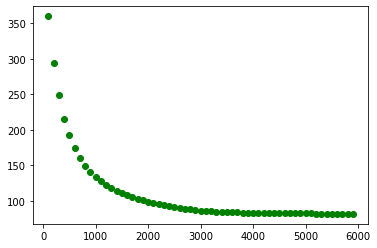

In [28]:
import matplotlib.pyplot as plt
plt.plot(cost_list[0][1:], cost_list[1][1:],'go')

In [29]:
Z1 = np.dot(W1,X_test.T)+b1
A1 = g1(Z1)
Z2 = np.dot(W2, A1)+b2
A2 = g1(Z2)
predictions = A2.copy()
predictions[A2<0.5]=0
predictions[A2>0.5]=1


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test2[0], predictions[0]))
print(classification_report(y_test2[0], predictions[0]))

[[81  1]
 [ 3 55]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98        82
           1       0.98      0.95      0.96        58

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



## In order to make sure we are not accidentally cross training, clear out the values we have stored above

In [35]:
del(W1, W2, b1, b2, Z1, A1, Z2, A2, cost_list)

In [33]:
W1, b1, W2, b2, cost_list = NN(X_train.T, y_train.T, 5, 1, 0.1, 6000)

In [34]:
Z1 = np.dot(W1,X_test.T)+b1
A1 = g1(Z1)
Z2 = np.dot(W2, A1)+b2
A2 = g1(Z2)
predictions = A2.copy()
predictions[A2<0.5]=0
predictions[A2>0.5]=1
print(confusion_matrix(y_test2[0], predictions[0]))
print(classification_report(y_test2[0], predictions[0]))

[[81  1]
 [23 35]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        82
           1       0.97      0.60      0.74        58

    accuracy                           0.83       140
   macro avg       0.88      0.80      0.81       140
weighted avg       0.86      0.83      0.82       140



In [36]:
import matplotlib.pyplot as plt
plt.plot(cost_list[0][1:], cost_list[1][1:],'go')

NameError: name 'cost_list' is not defined

In [ ]:
del(W1, W2, b1, b2, Z1, A1, Z2, A2)

In [37]:
W1, b1, W2, b2, cost_list = NN(X_train.T, y_train.T, 10, 1, 0.1, 6000)

In [38]:
Z1 = np.dot(W1,X_test.T)+b1
A1 = g1(Z1)
Z2 = np.dot(W2, A1)+b2
A2 = g1(Z2)
predictions = A2.copy()
predictions[A2<0.5]=0
predictions[A2>0.5]=1
print(confusion_matrix(y_test2[0], predictions[0]))
print(classification_report(y_test2[0], predictions[0]))

[[81  1]
 [ 2 56]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        82
           1       0.98      0.97      0.97        58

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



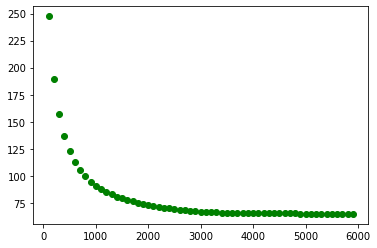

In [39]:
import matplotlib.pyplot as plt
plt.plot(cost_list[0][1:], cost_list[1][1:],'go')

In [40]:
X_train, X_test, y_train, y_test= train_test_split(df.iloc[0:, 1:10],df['Class'], test_size=0.4)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_test2= y_test.T

In [41]:
del(W1, W2, b1, b2, Z1, A1, Z2, A2)
W1, b1, W2, b2, cost_list = NN(X_train.T, y_train.T, 10, 1, 0.1, 6000)

In [42]:
Z1 = np.dot(W1,X_test.T)+b1
A1 = g1(Z1)
Z2 = np.dot(W2, A1)+b2
A2 = g1(Z2)
predictions = A2.copy()
predictions[A2<0.5]=0
predictions[A2>0.5]=1
print(confusion_matrix(y_test2[0], predictions[0]))
print(classification_report(y_test2[0], predictions[0]))

[[178   4]
 [  8  90]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       182
           1       0.96      0.92      0.94        98

    accuracy                           0.96       280
   macro avg       0.96      0.95      0.95       280
weighted avg       0.96      0.96      0.96       280



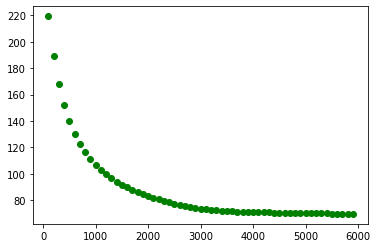

In [43]:
import matplotlib.pyplot as plt
plt.plot(cost_list[0][1:], cost_list[1][1:],'go')

In [45]:
X_train, X_test, y_train, y_test= train_test_split(df.iloc[0:, 1:10],df['Class'], test_size=0.1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_test2= y_test.T
print(df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(699, 11) (629, 9) (70, 9) (629, 1) (70, 1)


In [46]:
del(W1, W2, b1, b2, Z1, A1, Z2, A2)
W1, b1, W2, b2, cost_list = NN(X_train.T, y_train.T, 10, 1, 0.1, 6000)

In [47]:
Z1 = np.dot(W1,X_test.T)+b1
A1 = g1(Z1)
Z2 = np.dot(W2, A1)+b2
A2 = g1(Z2)
predictions = A2.copy()
predictions[A2<0.5]=0
predictions[A2>0.5]=1
print(confusion_matrix(y_test2[0], predictions[0]))
print(classification_report(y_test2[0], predictions[0]))

[[44  2]
 [ 1 23]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.92      0.96      0.94        24

    accuracy                           0.96        70
   macro avg       0.95      0.96      0.95        70
weighted avg       0.96      0.96      0.96        70



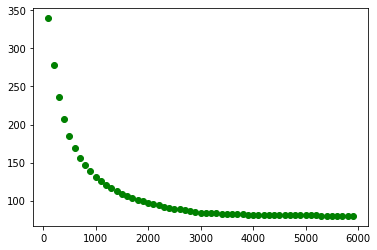

In [48]:
import matplotlib.pyplot as plt
plt.plot(cost_list[0][1:], cost_list[1][1:],'go')

In [54]:
def NN_RSME(X, y, n_h, n_y, alpha, iterations):
    stage_1 = iterations//2; alpha2 = alpha/2.
    stage_2 = iterations//1.75; alpha3 = alpha/4.
    stage_3 = iterations//1.5; alpha4 = alpha/8.
    
    cost_list = [[],[]]
    m = X.shape[1]
    n_x = X.shape[0]
    
    W1 = np.random.randn(n_h, n_x)*0.1 #initialize the weight matrix so we dont start at 0
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    
    for i in range(iterations):
        Z1 = np.dot(W1, X)+b1
        A1 = g1(Z1)
        Z2 = np.dot(W2, A1)+b2
        A2 = g1(Z2)
        if i%100==0:
            cost = np.sqrt(np.sum((y-A2)**2)/m)#this is using cross entropy as the cost function
            cost_list[0].append(i)
            cost_list[1].append(cost)
        dZ2 = A2-y
        dW2 = (1/m)*np.dot(dZ2, A1.T)
        db2 = (1/m)*np.sum(dZ2)
        dZ1 = np.dot(W2.T, dZ2)*g1_prime(Z1)
        dW1 = (1/m)*np.dot(dZ1, X.T)
        db1 = (1/m)*np.sum(dZ1)
        W2 = W2-alpha*dW2
        b2 = b2-alpha*db2
        W1 = W1-alpha*dW1
        b1 = b1-alpha*db1
        
        if i>stage_3: alpha = alpha4
        elif i>stage_2: alpha = alpha3
        elif i>stage_1: alpha = alpha2
    return W1, b1, W2, b2, cost_list

In [55]:
X_train, X_test, y_train, y_test= train_test_split(df.iloc[0:, 1:10],df['Class'], test_size=0.2)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_test2= y_test.T
print(df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(699, 11) (559, 9) (140, 9) (559, 1) (140, 1)


In [56]:
del(W1, W2, b1, b2, Z1, A1, Z2, A2)
W1, b1, W2, b2, cost_list = NN_RSME(X_train.T, y_train.T, 10, 1, 0.1, 6000)

In [57]:
Z1 = np.dot(W1,X_test.T)+b1
A1 = g1(Z1)
Z2 = np.dot(W2, A1)+b2
A2 = g1(Z2)
predictions = A2.copy()
predictions[A2<0.5]=0
predictions[A2>0.5]=1
print(confusion_matrix(y_test2[0], predictions[0]))
print(classification_report(y_test2[0], predictions[0]))

[[93  2]
 [ 9 36]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        95
           1       0.95      0.80      0.87        45

    accuracy                           0.92       140
   macro avg       0.93      0.89      0.91       140
weighted avg       0.92      0.92      0.92       140



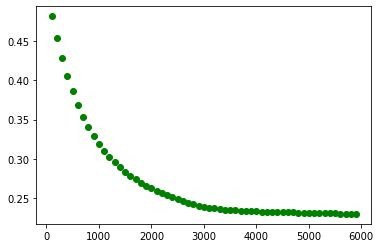

In [58]:
import matplotlib.pyplot as plt
plt.plot(cost_list[0][1:], cost_list[1][1:],'go')

In [114]:
def NN_batch(X, y, n_h, n_y, alpha, iterations, batch_size):
    stage_1 = iterations//2; alpha2 = alpha/2.
    stage_2 = iterations//1.75; alpha3 = alpha/4.
    stage_3 = iterations//1.5; alpha4 = alpha/8.
    
    cost_list = [[],[]]
    m = X.shape[1]
    n_x = X.shape[0]
    
    W1 = np.random.randn(n_h, n_x)*0.1 #initialize the weight matrix so we dont start at 0
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    
    
    for i in range(iterations):
        for j in range(0, m, batch_size):
            #print(j)
            X_batch = X.iloc[:, j:j+batch_size]
            y_batch = y[:,j:j+batch_size]
            
            Z1 = np.dot(W1, X_batch) + b1
            A1 = sigmoid(Z1)
            Z2 = np.dot(W2, A1) + b2
            A2 = sigmoid(Z2)
            
            #print(A2.shape)
            #print(y_batch.shape)

            dZ2 = A2 - y_batch
            dW2 = (1/m) * np.dot(dZ2, A1.T)
            db2 = (1/m) * np.sum(dZ2)
            dZ1 = np.dot(W2.T, dZ2) * g1_prime(Z1)
            dW1 = (1/m) * np.dot(dZ1, X_batch.T)
            db1 = (1/m) * np.sum(dZ1)
            W2 = W2 - alpha * dW2
            b2 = b2 - alpha * db2
            W1 = W1 - alpha * dW1
            b1 = b1 - alpha * db1
            if i>stage_3: alpha = alpha4
            elif i>stage_2: alpha = alpha3
            elif i>stage_1: alpha = alpha2
                
        if i%2 == 0:
            Z1 = np.dot(W1, X) + b1
            A1 = sigmoid(Z1)
            Z2 = np.dot(W2, A1) + b2
            A2 = sigmoid(Z2)
            cost = -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))#this is using cross entropy as the cost function
            cost_list[0].append(i)
            cost_list[1].append(cost)
    return W1, b1, W2, b2, cost_list

In [104]:
X_train, X_test, y_train, y_test= train_test_split(df.iloc[0:, 1:10],df['Class'], test_size=0.2)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_test2= y_test.T
print(df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(699, 11) (559, 9) (140, 9) (559, 1) (140, 1)


In [105]:
del(W1, W2, b1, b2, Z1, A1, Z2, A2)

NameError: name 'W1' is not defined

In [106]:
batch_size = 32
W1, b1, W2, b2, cost_list = NN_batch(X_train.T, y_train.T, 10, 1, 0.1, 6000, 32)

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)

448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)

448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)


(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 

(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)

(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)

160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1,

(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1,

(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)

448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1,

96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)

(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1,

288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1,

(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)

(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1

544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1,

(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1,

352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1,

352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1,

(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32

288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1,

64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)


32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(

(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)

(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)

(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)

480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1,

224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1,

384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1,

192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1

512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1,

448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1,

32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(

(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)

512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1,

128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)


(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)

(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)

416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1,

224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1,

352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1,

(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1

(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)

(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1

192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1

(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 

(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 3

384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1,

512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1,

416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1,

192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1

480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1,

160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(

(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)

512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1,

416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1,

(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 3

448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1,

(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1,

(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 3

(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32

416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1,

448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1,

288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1,

(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)

544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1,

384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)

352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1,

320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1,

(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)

192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1

544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1,

128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)


448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(

(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)

(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 

480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1,

320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1,

96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1,

(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 3

544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1,

512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1,

128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)


288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1,

64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)


160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(

512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1,

(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1

192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1

(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)

384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1,

(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)

32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(

480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1

544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1,

448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1,

(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)

128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)


0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1,

544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)


448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)

416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1,

192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1

320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1,

(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)

256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)

480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1,

160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(

64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)


544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1,

(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)

(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1,

(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1,

448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1,

224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1,

64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)


384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1,

320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1,

160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(

512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)

64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)


352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1,

288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1,

320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1,

512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1,

288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1,

224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1,

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1,

192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1

0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1,

480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1,

512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1,

(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)
0
(1, 32)
(1, 32)
32
(1, 32)
(1, 32)
64
(1, 32)
(1, 32)
96
(1, 32)
(1, 32)
128
(1, 32)
(1, 32)
160
(1, 32)
(1, 32)
192
(1, 32)
(1, 32)
224
(1, 32)
(1, 32)
256
(1, 32)
(1, 32)
288
(1, 32)
(1, 32)
320
(1, 32)
(1, 32)
352
(1, 32)
(1, 32)
384
(1, 32)
(1, 32)
416
(1, 32)
(1, 32)
448
(1, 32)
(1, 32)
480
(1, 32)
(1, 32)
512
(1, 32)
(1, 32)
544
(1, 15)
(1, 15)


[[72  3]
 [ 0 65]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.96      1.00      0.98        65

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



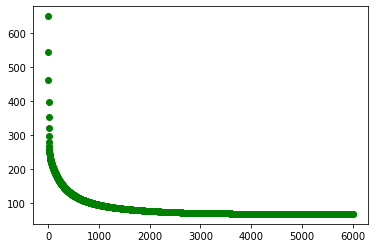

In [108]:
Z1 = np.dot(W1,X_test.T)+b1
A1 = g1(Z1)
Z2 = np.dot(W2, A1)+b2
A2 = g1(Z2)
predictions = A2.copy()
predictions[A2<0.5]=0
predictions[A2>0.5]=1
print(confusion_matrix(y_test2[0], predictions[0]))
print(classification_report(y_test2[0], predictions[0]))
plt.plot(cost_list[0][1:], cost_list[1][1:],'go')

In [112]:
del(W1, W2, b1, b2, Z1, A1, Z2, A2)


NameError: name 'W1' is not defined

In [113]:
W1, b1, W2, b2, cost_list = NN_batch(X_train.T, y_train.T, 10, 1, 0.1, 6000, 64)

0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
1

64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192

0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
1

256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
38

0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
1

320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
44

256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
38

64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192

64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192

0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
1

192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
32

384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
51

192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
32

384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
51

128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
25

448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0


512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
1

192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
32

384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
51

320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
44

448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0


320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
448
512
0
64
128
192
256
320
384
44

[[72  3]
 [ 5 60]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        75
           1       0.95      0.92      0.94        65

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



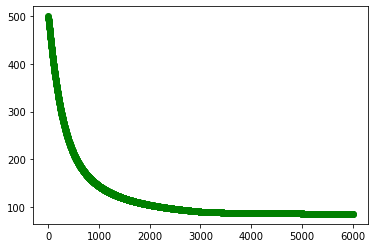

In [115]:
Z1 = np.dot(W1,X_test.T)+b1
A1 = g1(Z1)
Z2 = np.dot(W2, A1)+b2
A2 = g1(Z2)
predictions = A2.copy()
predictions[A2<0.5]=0
predictions[A2>0.5]=1
print(confusion_matrix(y_test2[0], predictions[0]))
print(classification_report(y_test2[0], predictions[0]))
plt.plot(cost_list[0][1:], cost_list[1][1:],'go')